## BAN200 - ZAA - Sentiment Analysis and Text Mining

## Assignment 2
Performing Sentiment analysis on hotel reviews using two machine learning techniques - logistic regression model and vader sentiment analyzer. And then comparing accuracy of both results to find which model did a better job.

In [ ]:
Authors: 
Rahil Ansari | Parth Shah | Rangeetha | Melissa Pinheiro | Shivani Nanavati

In [ ]:
Date: 29 July, 2021

#  Data analysis of Text Data including Visualization
## Data Loading & Cleaning

Importing the Pandas library for dataframe use
and reading the hotel reviews file

In [1]:
import pandas as pd

hotel = pd.read_csv('7282_1.csv')

hotel.head()

address categories      city country   latitude  longitude  \
0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
1  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
2  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
3  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
4  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   

                 name postalCode province          reviews.date  \
0  Hotel Russo Palace      30126       GA  2013-09-22T00:00:00Z   
1  Hotel Russo Palace      30126       GA  2015-04-03T00:00:00Z   
2  Hotel Russo Palace      30126       GA  2014-05-13T00:00:00Z   
3  Hotel Russo Palace      30126       GA  2013-10-27T00:00:00Z   
4  Hotel Russo Palace      30126       GA  2015-03-05T00:00:00Z   

      reviews.dateAdded  reviews.doRecommend  reviews.id  reviews.rating  \
0  2016-10-24T00:00:25Z                  NaN         NaN             4.0   
1  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
2  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
3  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
4  2016-10-24T00:00:25Z                  NaN         NaN             5.0   

                                        reviews.text  \
0  Pleasant 10 min walk along the sea front to th...   
1  Really lovely hotel. Stayed on the very top fl...   
2  Ett mycket bra hotell. Det som drog ner betyge...   
3  We stayed here for four nights in October. The...   
4  We stayed here for four nights in October. The...   

                        reviews.title reviews.userCity reviews.username  \
0  Good location away from the crouds              NaN      Russ (kent)   
1      Great hotel with Jacuzzi bath!              NaN       A Traveler   
2                         Lugnt l��ge              NaN             Maud   
3          Good location on the Lido.              NaN            Julie   
4              ������ ���������������              NaN         sungchul   

  reviews.userProvince  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [3]:
hotel  = hotel[['name', 'reviews.rating', 'reviews.text']]

hotel.head()

name  reviews.rating  \
0  Hotel Russo Palace             4.0   
1  Hotel Russo Palace             5.0   
2  Hotel Russo Palace             5.0   
3  Hotel Russo Palace             5.0   
4  Hotel Russo Palace             5.0   

                                        reviews.text  
0  Pleasant 10 min walk along the sea front to th...  
1  Really lovely hotel. Stayed on the very top fl...  
2  Ett mycket bra hotell. Det som drog ner betyge...  
3  We stayed here for four nights in October. The...  
4  We stayed here for four nights in October. The...

Checking null values in the rows


In [4]:
print(len(hotel) - len(hotel.dropna()))


884


Removing the null values 

In [5]:
hotel = hotel.dropna()
len(hotel)

35028

Check the value count of hotel reviews

In [6]:
hotel['name'].value_counts()

The Alexandrian, Autograph Collection    1185
Howard Johnson Inn - Newburgh             714
Americas Best Value Inn                   566
Fiesta Inn and Suites                     546
Ip Casino Resort Spa                      392
                                         ... 
Petretti Apartments                         1
Nesco Manor Hotel                           1
Brooks Donald L Jr                          1
Days Inn Marion                             1
Regency Inn Motel                           1
Name: name, Length: 792, dtype: int64

Some hotels have only 1 review and hence its not possible to draw conclusion out of 1 review and hence considering the hotels with atleast reviews more than 25

In [7]:
hotel = hotel[hotel.groupby("name")["name"].transform('size') > 25]

In [8]:
len(hotel)

32197

As part of the data cleaning exercise,changing the review column to string format just in case if there are any non string valules.

In [9]:
hotel['reviews.text'] = hotel['reviews.text'].astype(str)

Since reviews.text is the important information,if any hotel reviews are null we do not need to consider that record,hence removing any null values if there are any

In [10]:
hotel = hotel[~hotel["reviews.text"].isnull()]

In [11]:
len(hotel)

32197

We still have 32197 records which means no null reviews.text values in the dataset.

## Data Pre processing 

Deleting the Special Characters:Reviews may contain special characters which are not helpful for analysis ,hence cleaning them.

In [12]:
def clean(txt):
    txt = txt.str.replace("(<br/>)", "")
    txt = txt.str.replace('(<a).*(>).*(</a>)', '')
    txt = txt.str.replace('(&amp)', '')
    txt = txt.str.replace('(&gt)', '')
    txt = txt.str.replace('(&lt)', '')
    txt = txt.str.replace('(\xa0)', ' ')  
    return txt
hotel['reviews.text'] = clean(hotel['reviews.text'])

Converting to lower case so that  for eg: the and The are not considered as different words

In [13]:
hotel['reviews1.text'] = hotel['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
hotel['reviews1.text'].head()

0    pleasant 10 min walk along the sea front to th...
1    really lovely hotel. stayed on the very top fl...
2    ett mycket bra hotell. det som drog ner betyge...
3    we stayed here for four nights in october. the...
4    we stayed here for four nights in october. the...
Name: reviews1.text, dtype: object

Removing stopwords.

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
hotel['reviews1.text'] = hotel['reviews1.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
hotel['reviews1.text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    pleasant 10 min walk along sea front water bus...
1    really lovely hotel. stayed top floor surprise...
2    ett mycket bra hotell. det som drog ner betyge...
3    stayed four nights october. hotel staff welcom...
4    stayed four nights october. hotel staff welcom...
Name: reviews1.text, dtype: object

All the stopwords have been removed now.

Stemming and lemmatization ,cutting down the parts like 'ly','ing' etc

In [16]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
hotel['reviews1.text'] = hotel['reviews1.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [19]:
import nltk
nltk.download('wordnet')
from textblob import Word
hotel['reviews1.text'] = hotel['reviews1.text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
hotel['reviews1.text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAHIL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


0    pleasant 10 min walk along sea front water bus...
1    realli love hotel. stay top floor surpris jacu...
2    ett mycket bra hotell. det som drog ner betyge...
3    stay four night october. hotel staff welcoming...
4    stay four night october. hotel staff welcoming...
Name: reviews1.text, dtype: object

Removing the punctuations 

In [21]:
hotel['reviews1.text'] = hotel['reviews1.text'].str.replace('[^\w\s]', '')
hotel['reviews1.text'].head()

0    pleasant 10 min walk along sea front water bus...
1    realli love hotel stay top floor surpris jacuz...
2    ett mycket bra hotell det som drog ner betyget...
3    stay four night october hotel staff welcoming ...
4    stay four night october hotel staff welcoming ...
Name: reviews1.text, dtype: object

## Data Analysis

Lets add some additional columns for our data analysis like length of the review,word count of the review and also polarity of the review.
Polarity shows the sentiment of a piece of text ,it counts the positive and negative words and determines the polarity .The value ranges from 
-1 to 1 ,where -1 represents negative ,0 represents neutral and 1 represents positive sentiment.

In [22]:
hotel['review_len'] = hotel['reviews.text'].astype(str).apply(len)
hotel['word_count'] = hotel['reviews.text'].apply(lambda x: len(str(x).split()))
from textblob import TextBlob, Word, Blobber
hotel['polarity'] = hotel['reviews1.text'].map(lambda text: TextBlob(text).sentiment.polarity)
hotel.head()

name  reviews.rating  \
0  Hotel Russo Palace             4.0   
1  Hotel Russo Palace             5.0   
2  Hotel Russo Palace             5.0   
3  Hotel Russo Palace             5.0   
4  Hotel Russo Palace             5.0   

                                        reviews.text  \
0  Pleasant 10 min walk along the sea front to th...   
1  Really lovely hotel. Stayed on the very top fl...   
2  Ett mycket bra hotell. Det som drog ner betyge...   
3  We stayed here for four nights in October. The...   
4  We stayed here for four nights in October. The...   

                                       reviews1.text  review_len  word_count  \
0  pleasant 10 min walk along sea front water bus...         194          33   
1  realli love hotel stay top floor surpris jacuz...         252          44   
2  ett mycket bra hotell det som drog ner betyget...         136          28   
3  stay four night october hotel staff welcoming ...         354          59   
4  stay four night october hotel staff welcoming ...         354          59   

   polarity  
0  0.716667  
1  0.680000  
2  0.350000  
3  0.309524  
4  0.309524

Distribution of word_count ,review_length and polarity 

array([[<AxesSubplot:title={'center':'review_len'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'polarity'}>, <AxesSubplot:>]],
      dtype=object)

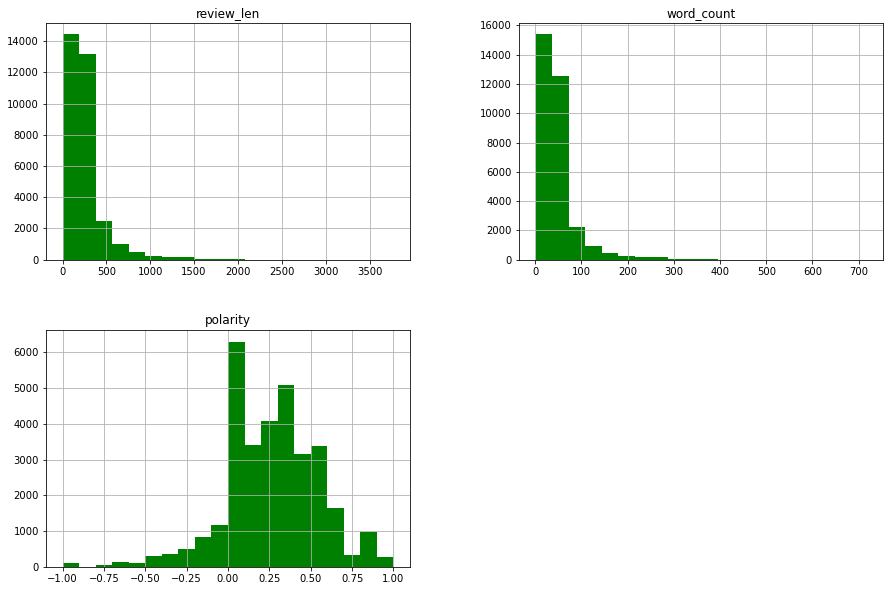

In [23]:
hotel[["review_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10), color='green',grid ='false')

The majority polarity is more than zero. That means maximum reviews have a positive sentiment.

Counting the hotel reviews for each Rating 

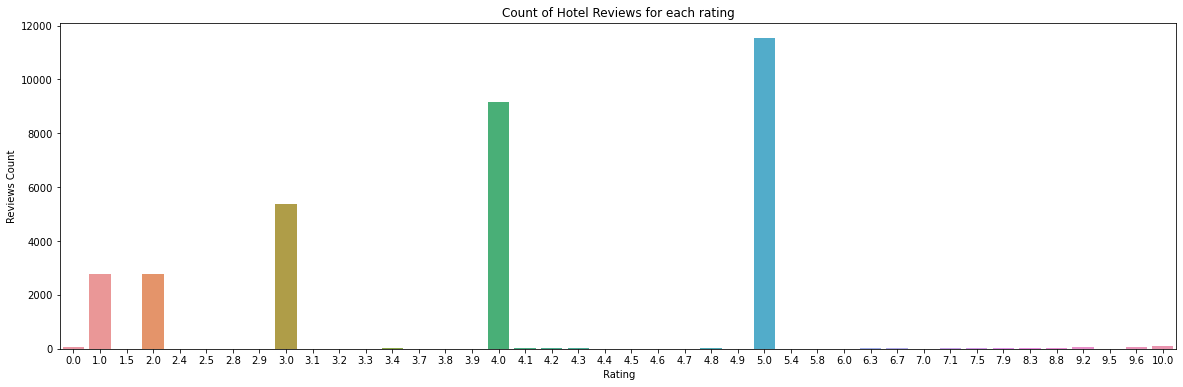

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 6))
sns.countplot(x='reviews.rating', data=hotel)
plt.xlabel(" Rating")
plt.ylabel( "Reviews Count")
plt.title("Count of Hotel Reviews for each rating")
plt.show()

Most of the reviews of the dataset have a rating of 5 followed by 4 and then 2 & 1

let us  see if the review length changes with rating.


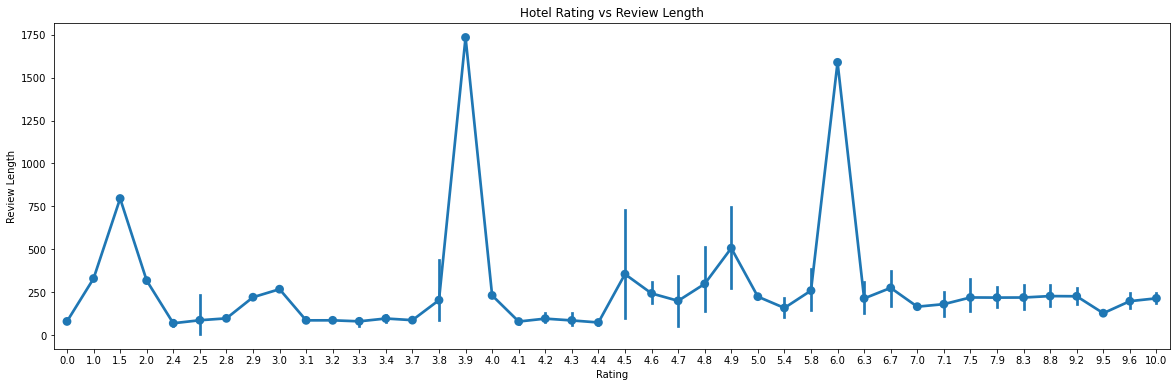

In [27]:
plt.figure(figsize=(20, 6))
sns.pointplot(x = "reviews.rating", y = "review_len", data = hotel)
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.title("Hotel Rating vs Review Length")
plt.show()

When the rating is 4 and 6, review length significantly goes up.But as the rating increaese beyond 6 ,the review length goes down.
so when customers were happy, they didn’t write too much!


#### Polarity
The top 20 hotels based on the polarity

In [29]:
import numpy as np
hotel_pol = hotel.groupby('name')['polarity'].agg([np.mean])
hotel_pol.columns = ['polarity']
hotel_pol = hotel_pol.sort_values('polarity', ascending=False)
hotel_pol = hotel_pol.head(20)
hotel_pol

polarity
name                                                        
The Inn At Bella Vista                              0.476999
Hyatt Place Pittsburgh Cranberry                    0.432823
Inturotel Esmeralda Park                            0.418810
Springhill Suites Marriott Colorado Springs South   0.418161
Staybridge Suites Tyler University Area             0.416990
Comfort Inn Deland - Near University                0.416103
Doubletree By Hilton Hotel Bay City - Riverfront    0.411125
Candlewood Suites Lexington                         0.410749
Merritt House Inn                                   0.404777
Hotel Mc Call                                       0.399033
La Quinta Inn & Suites Bryant                       0.391952
Holiday Inn Express Hotel and Suites Meadowland...  0.382875
The Westin Europa and Regina                        0.382373
Residence Inn By Marriott Irvine John Wayne Air...  0.380465
Americinn Lodge Suites Princeton                    0.378222
Hampton Inn Virginia Beach Oceanfront North         0.376358
Gran Melia Victoria                                 0.375526
Hampton Inn Grand Junction Downtown/historic Ma...  0.375401
Country Inn and Suites By Carlson Galena            0.372778
Hampton Inn New Orleans - Downtown                  0.368990

#### Word Cloud 
Visualization to plot the frequency of words used in the review

In [30]:
conda install -c conda-forge wordcloud

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\RAHIL\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_0         3.1 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    wordcloud-1.8.1            |   py38h294d835_1         196 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38
  wordcloud          conda-forge/win-64::wordcloud-1.8.1-py38h294d835_1

The following packages will be UPDATED:

  conda               pkgs/main::conda-4.9.2-py



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




conda-4.10.3         | 3.1 MB    |            |   1% 
conda-4.10.3         | 3.1 MB    | #####2     |  53% 
conda-4.10.3         | 3.1 MB    | ########## | 100% 
conda-4.10.3         | 3.1 MB    | ########## | 100% 

wordcloud-1.8.1      | 196 KB    |            |   0% 
wordcloud-1.8.1      | 196 KB    | 8          |   8% 
wordcloud-1.8.1      | 196 KB    | ########## | 100% 
wordcloud-1.8.1      | 196 KB    | ########## | 100% 

python_abi-3.8       | 4 KB      |            |   0% 
python_abi-3.8       | 4 KB      | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [32]:
hotel_new = hotel.rename(columns = {'reviews1.text': 'reviews1','reviews.text':'reviews'}, inplace = False)

text = " ".join(reviews for reviews in hotel_new.reviews1)

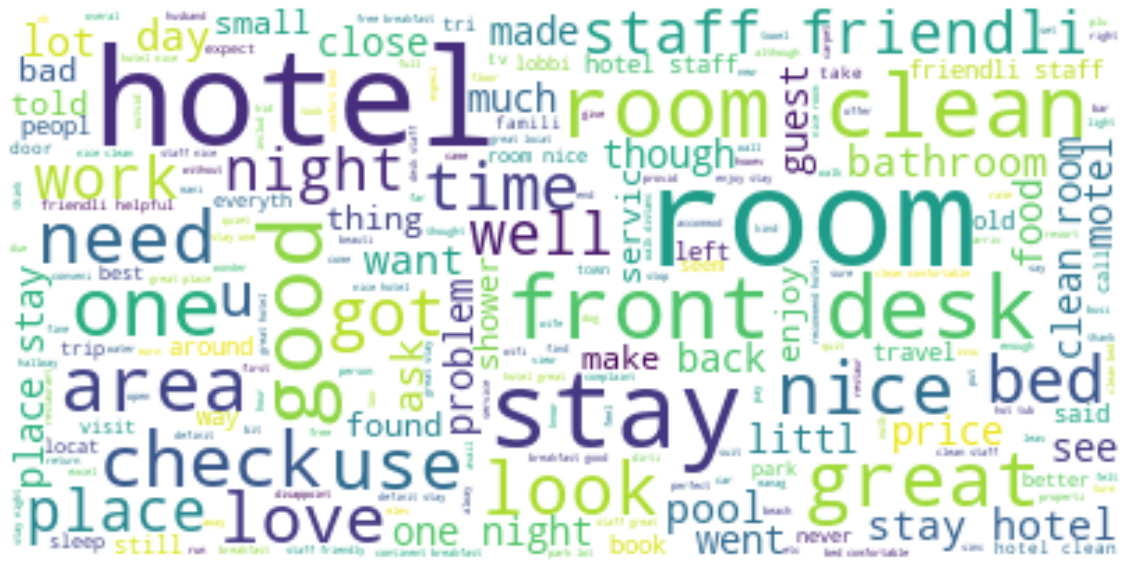

In [33]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])

wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(20, 14))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

The most frequent words as we can see are the bigger ones in size

Frequency Charts - First, find the frequency of each word in the review column of the dataset. 
Then plot the top 30 words based on the frequency

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(hotel_new['reviews1'], 30)
hotel1 = pd.DataFrame(common_words, columns = ['Review', 'count'])
hotel1.head()

Review  count
0   room  22441
1  hotel  17822
2   stay  15059
3  staff   9373
4  clean   9306

<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

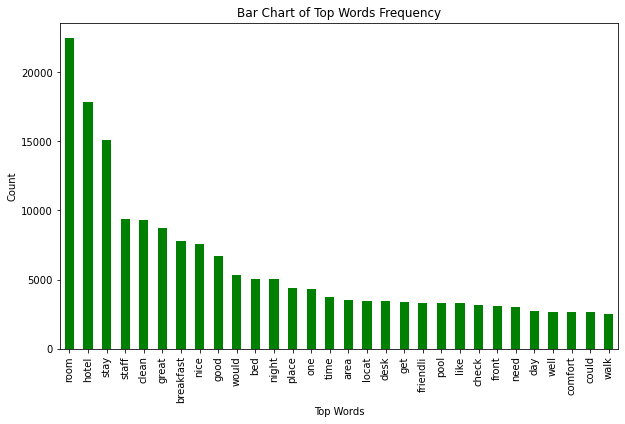

In [36]:
hotel1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency",
    grid=False,
    color='green'
   
)

These are the topmost occurring words in the hotel reviews. 
Since bugrams and trigrams provide more  meaning. we will now plot the topmost frequent bigrams and trigrams:

In [38]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(hotel_new['reviews1'], 30)
hotel2 = pd.DataFrame(common_words2, columns=['Reviews', "Count"])
hotel2.head()

Reviews  Count
0      front desk   2503
1      room clean   2273
2      stay again   1423
3  staff friendli   1125
4      stay hotel    938

<AxesSubplot:title={'center':'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

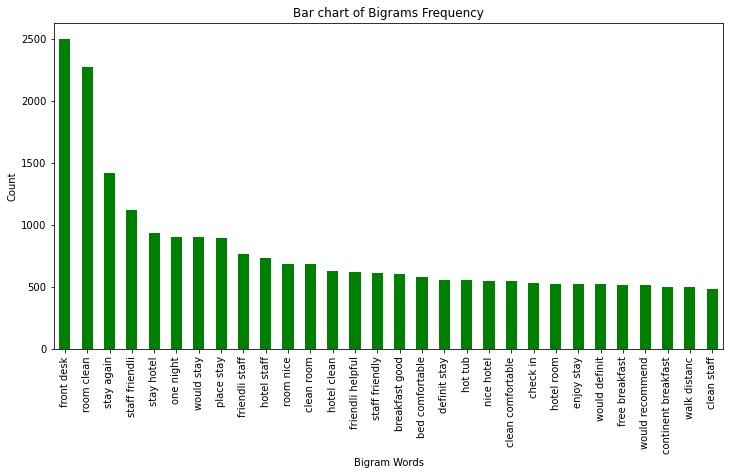

In [39]:
hotel2.groupby('Reviews').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency",
    grid =False,
    color='green'
)

<AxesSubplot:title={'center':'Bar chart of Trigrams Frequency'}, xlabel='Trigram Words', ylabel='Count'>

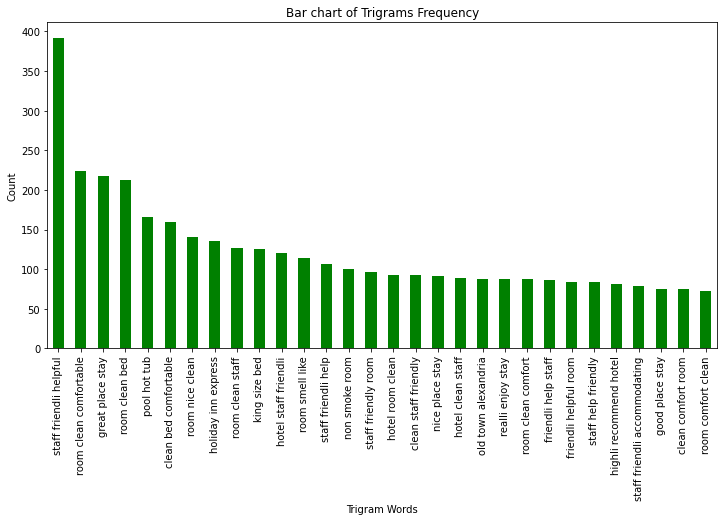

In [40]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(hotel_new['reviews1'], 30)
hotel3 = pd.DataFrame(common_words3, columns = ['Reviews' , 'Count'])
hotel3.groupby('Reviews').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency",
    grid= False,
    color='green'
    
)

Part of Speech Tagging -process of tagging the words with the part of speech such as nouns, pronouns, verbs, adjectives etc 

<AxesSubplot:title={'center':'Bar Chart of the Frequency of the Parts of Speech'}, xlabel='Part Of Speech', ylabel='Frequency'>

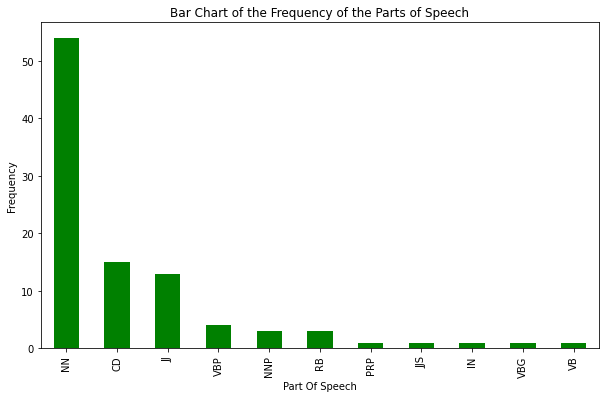

In [41]:
blob = TextBlob(str(hotel_new['reviews1']))
pos_hotel = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_hotel = pos_hotel.pos.value_counts()[:30]
pos_hotel.plot(kind='bar',
            xlabel = "Part Of Speech",
           ylabel = "Frequency",
           title = "Bar Chart of the Frequency of the Parts of Speech",
           figsize=(10, 6),
           grid=False,
           color='green')

Removing reviews that have rating 3 out of 5 because it can be ambigous i.e. neither positive nor negative

In [42]:
len(hotel)

32197

In [43]:
hotel = hotel [hotel['reviews.rating'] !=3]
len(hotel)

26813

Creating a sentiment column inside hotel dataframe to classify the type of the review.

If the hotel got 4 or 5 rating then its considered a positive review and tagged as 1
and If the hotel got 1 or 2 rating then its considered a negative review and tagged as 0


In [44]:
def sentiment(n):
    return 1 if n>=4 else 0

hotel['sentiment'] = hotel['reviews.rating'].apply(sentiment)
hotel.head()

name  reviews.rating  \
0  Hotel Russo Palace             4.0   
1  Hotel Russo Palace             5.0   
2  Hotel Russo Palace             5.0   
3  Hotel Russo Palace             5.0   
4  Hotel Russo Palace             5.0   

                                        reviews.text  \
0  Pleasant 10 min walk along the sea front to th...   
1  Really lovely hotel. Stayed on the very top fl...   
2  Ett mycket bra hotell. Det som drog ner betyge...   
3  We stayed here for four nights in October. The...   
4  We stayed here for four nights in October. The...   

                                       reviews1.text  review_len  word_count  \
0  pleasant 10 min walk along sea front water bus...         194          33   
1  realli love hotel stay top floor surpris jacuz...         252          44   
2  ett mycket bra hotell det som drog ner betyget...         136          28   
3  stay four night october hotel staff welcoming ...         354          59   
4  stay four night october hotel staff welcoming ...         354          59   

   polarity  sentiment  
0  0.716667          1  
1  0.680000          1  
2  0.350000          1  
3  0.309524          1  
4  0.309524          1

Combining Hotel Name and the text review for better features 

In [45]:
def combined_column (record):
    return record ['name'] + ' ' + record['reviews.text']

hotel['all_reviews'] = hotel.apply(combined_column, axis=1)

hotel.head()

name  reviews.rating  \
0  Hotel Russo Palace             4.0   
1  Hotel Russo Palace             5.0   
2  Hotel Russo Palace             5.0   
3  Hotel Russo Palace             5.0   
4  Hotel Russo Palace             5.0   

                                        reviews.text  \
0  Pleasant 10 min walk along the sea front to th...   
1  Really lovely hotel. Stayed on the very top fl...   
2  Ett mycket bra hotell. Det som drog ner betyge...   
3  We stayed here for four nights in October. The...   
4  We stayed here for four nights in October. The...   

                                       reviews1.text  review_len  word_count  \
0  pleasant 10 min walk along sea front water bus...         194          33   
1  realli love hotel stay top floor surpris jacuz...         252          44   
2  ett mycket bra hotell det som drog ner betyget...         136          28   
3  stay four night october hotel staff welcoming ...         354          59   
4  stay four night october hotel staff welcoming ...         354          59   

   polarity  sentiment                                        all_reviews  
0  0.716667          1  Hotel Russo Palace Pleasant 10 min walk along ...  
1  0.680000          1  Hotel Russo Palace Really lovely hotel. Stayed...  
2  0.350000          1  Hotel Russo Palace Ett mycket bra hotell. Det ...  
3  0.309524          1  Hotel Russo Palace We stayed here for four nig...  
4  0.309524          1  Hotel Russo Palace We stayed here for four nig...

### Building the sentiment classifier 

For this we need to build a training and testing dataset. so we import train_test_split.

In [46]:

x = hotel['all_reviews']
y = hotel['sentiment']

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , random_state=0)


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
ctmTr = cv.fit_transform(x_train)
x_test_dtm = cv.transform(x_test)

Using Logistic regression to help us build a model that classifies a review as eiher positive or negative based on giben sentiment column and text review.

In [49]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(ctmTr, y_train)


LogisticRegression(max_iter=1000)

In [50]:
y_predicted = model.predict(x_test_dtm)

Testing the accuracy of the predcited sentiment.

As can be seen, the model provides us accuracy of 91.37 % when running on test dataset.

In [66]:
accuracy_score(y_test, y_predicted)

0.913782816229117

# Using Vader library to predict the sentiment

Importing list of postive and negative words from the txt files

In [53]:
positive= pd.read_csv('positive-words.txt', header=None, engine='python')
positive.columns=['words']


In [54]:
negative= pd.read_csv('negative-words.txt', header=None, engine='python')
negative.columns=['words']


Following code performs tokenization, stemming, removes stop words and numbers from each review to get us a cleaner dataset.

We use nltk python library for this data preprocessing.

In [55]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')


from nltk.corpus import stopwords
from nltk.stem.porter import *
stemmer = PorterStemmer()
stop_words = nltk.corpus.stopwords.words("english")

#preprocess function 
stem_words=lambda x: stemmer.stem(x)
break_into_words = lambda x : re.findall("[a-zA-Z0-9]+", x)
skip_stop_words = lambda x: [w for w in x if w not in list(stop_words)]
skip_numeric = lambda x : [w for w in x if not w.isnumeric()]

#apply pre-processing steps

processed_text= hotel['reviews.text'].map(stem_words)\
        .map(break_into_words)\
        .map(skip_stop_words)\
        .map(skip_numeric)

hotel['processed']=processed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using Vader sentiment analyzer to get polarity scores of eacch review.

Storing the scores in a new variable called results.

In [56]:
from nltk.sentiment import SentimentIntensityAnalyzer

sent_analyzer = SentimentIntensityAnalyzer()

results = hotel['reviews.text'].map(lambda x: sent_analyzer.polarity_scores(x))


In [57]:
results.head(10)

0     {'neg': 0.052, 'neu': 0.695, 'pos': 0.252, 'co...
1     {'neg': 0.019, 'neu': 0.5, 'pos': 0.481, 'comp...
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3     {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...
4     {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...
5     {'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'comp...
6     {'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'comp...
7     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: reviews.text, dtype: object

Converting the results series to a dataframe so that the compound polarity score could be used to check whether review is positive or negative.


In [58]:
results = pd.DataFrame(results.tolist())

Making sure that compound column has no null values and number of compound scores is equivalent to number of reviews

In [59]:
results['compound'].head(10)

0    0.8299
1    0.9828
2    0.0000
3    0.9643
4    0.9643
5    0.9779
6    0.9217
7    0.0000
8    0.0000
9    0.0000
Name: compound, dtype: float64

In [60]:
print(len(results['compound']))
print(len(hotel['sentiment']))

26813
26813


In [61]:
count = results["compound"].isna().sum()
print(count)

0


Introducing a vader sentiment column to hotel dataframe again to classify the type of the review.

If compound score of hotel is above 0 then its a positve reveiw and 1 is assigned to vader_sentiment column
and If the compound score of hotel is below 0 then its a positve reveiw and 0 is assigned.


In [62]:
def vader_sentiment(n):
    if n>=0:
        return 1
    else: 
        return 0

hotel['vader_sentiment'] = results['compound'].apply(vader_sentiment)
hotel = hotel.dropna()
hotel.head()

name  reviews.rating  \
0  Hotel Russo Palace             4.0   
1  Hotel Russo Palace             5.0   
2  Hotel Russo Palace             5.0   
3  Hotel Russo Palace             5.0   
4  Hotel Russo Palace             5.0   

                                        reviews.text  \
0  Pleasant 10 min walk along the sea front to th...   
1  Really lovely hotel. Stayed on the very top fl...   
2  Ett mycket bra hotell. Det som drog ner betyge...   
3  We stayed here for four nights in October. The...   
4  We stayed here for four nights in October. The...   

                                       reviews1.text  review_len  word_count  \
0  pleasant 10 min walk along sea front water bus...         194          33   
1  realli love hotel stay top floor surpris jacuz...         252          44   
2  ett mycket bra hotell det som drog ner betyget...         136          28   
3  stay four night october hotel staff welcoming ...         354          59   
4  stay four night october hotel staff welcoming ...         354          59   

   polarity  sentiment                                        all_reviews  \
0  0.716667          1  Hotel Russo Palace Pleasant 10 min walk along ...   
1  0.680000          1  Hotel Russo Palace Really lovely hotel. Stayed...   
2  0.350000          1  Hotel Russo Palace Ett mycket bra hotell. Det ...   
3  0.309524          1  Hotel Russo Palace We stayed here for four nig...   
4  0.309524          1  Hotel Russo Palace We stayed here for four nig...   

                                           processed  vader_sentiment  
0  [pleasant, min, walk, along, sea, front, water...              1.0  
1  [really, lovely, hotel, stayed, top, floor, su...              1.0  
2  [ett, mycket, bra, hotell, det, som, drog, ner...              1.0  
3  [stayed, four, nights, october, hotel, staff, ...              1.0  
4  [stayed, four, nights, october, hotel, staff, ...              1.0

Checking the accuracy of the results retrieved from Vader sentiment Analyzer

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(hotel['sentiment'] , hotel['vader_sentiment'] )

0.6979034468754759

## Outcome

It can be seen that accuracy of the results from Vader sentiment analyzer are 69.79 % which is lower in comparision to accuracy of results from our logistic regression model which was 91.37%.


In [64]:
print((hotel['sentiment']== 0).sum())
print((hotel['sentiment']== 1).sum())

3988
15711


In [65]:
print((hotel['vader_sentiment']== 0).sum())
print((hotel['vader_sentiment']== 1).sum())

3297
16402


There seems to be two reasons for lower accuracy for Vader sentiment analyzer 

1. Ambiguity - As it can be seen from above result, the vader sentiment analyzer classified a 16402 reviews as positive while the logistic model classifed 15711 reviews as positive. It means that certain words that would be considered non positive were considered as positive because of their ambigous nature.

2. Noise in the dataset - As reviews are human typed texts, they naturally have noise in them. We tried to preprocess and remove noise from data but evidently it weakened the accuracy of our model. 